In [33]:
%matplotlib inline
from qiskit import IBMQ, execute
from qiskit.pulse import Schedule, MeasureChannel, DriveChannel, AcquireChannel, MemorySlot, Play, GaussianSquare, Acquire, Gaussian
from qiskit.pulse.macros import measure_all, measure
from qiskit.test.mock import FakeAlmaden
from qiskit.visualization import plot_histogram
from qiskit.tools import job_monitor

backend = FakeAlmaden()
try:
    backend = IBMQ.load_account().get_backend(open_pulse=True)
    config = backend.configuration()

    # Basic Features
    print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
          "{4} OpenPulse programs. The basis gates supported on this device are {5}."
          "".format(config.backend_name,
                    config.backend_version,
                    config.n_qubits,
                    '' if config.n_qubits == 1 else 's',
                    'supports' if config.open_pulse else 'does not support',
                    config.basis_gates))
except:
    print("No internet")
    
def run(s, b):
    job = execute(s, b)
    job_monitor(job)
    return job.result().get_counts()

def get_custom_measurement():
    # Duration (in number of cycles) for readout 
    duration = 1600
    # Stimulus pulses for qubit 0
    measure_tx = Play(GaussianSquare(duration=duration, amp=0.2, sigma=10, width=duration - 50), MeasureChannel(0))
    measure_rx = Acquire(duration, AcquireChannel(0), MemorySlot(0))
    measure_sched = measure_tx + measure_rx
    return measure_sched

ibmqfactory.load_account:WARNING:2020-10-26 19:14:36,373: Credentials are already in use. The existing account in the session will be replaced.


This backend is called ibmq_armonk, and is on version 1.1.1. It has 1 qubit. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'u1', 'u2', 'u3'].


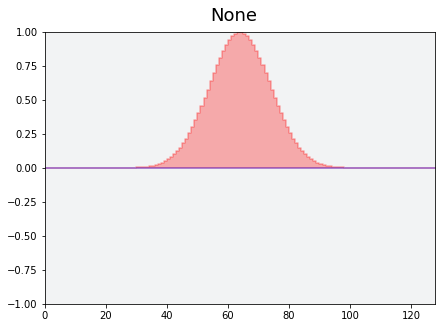

In [30]:
pulse = Gaussian(128, 1, 10, name="Parametric Gaus")
pulse.draw()

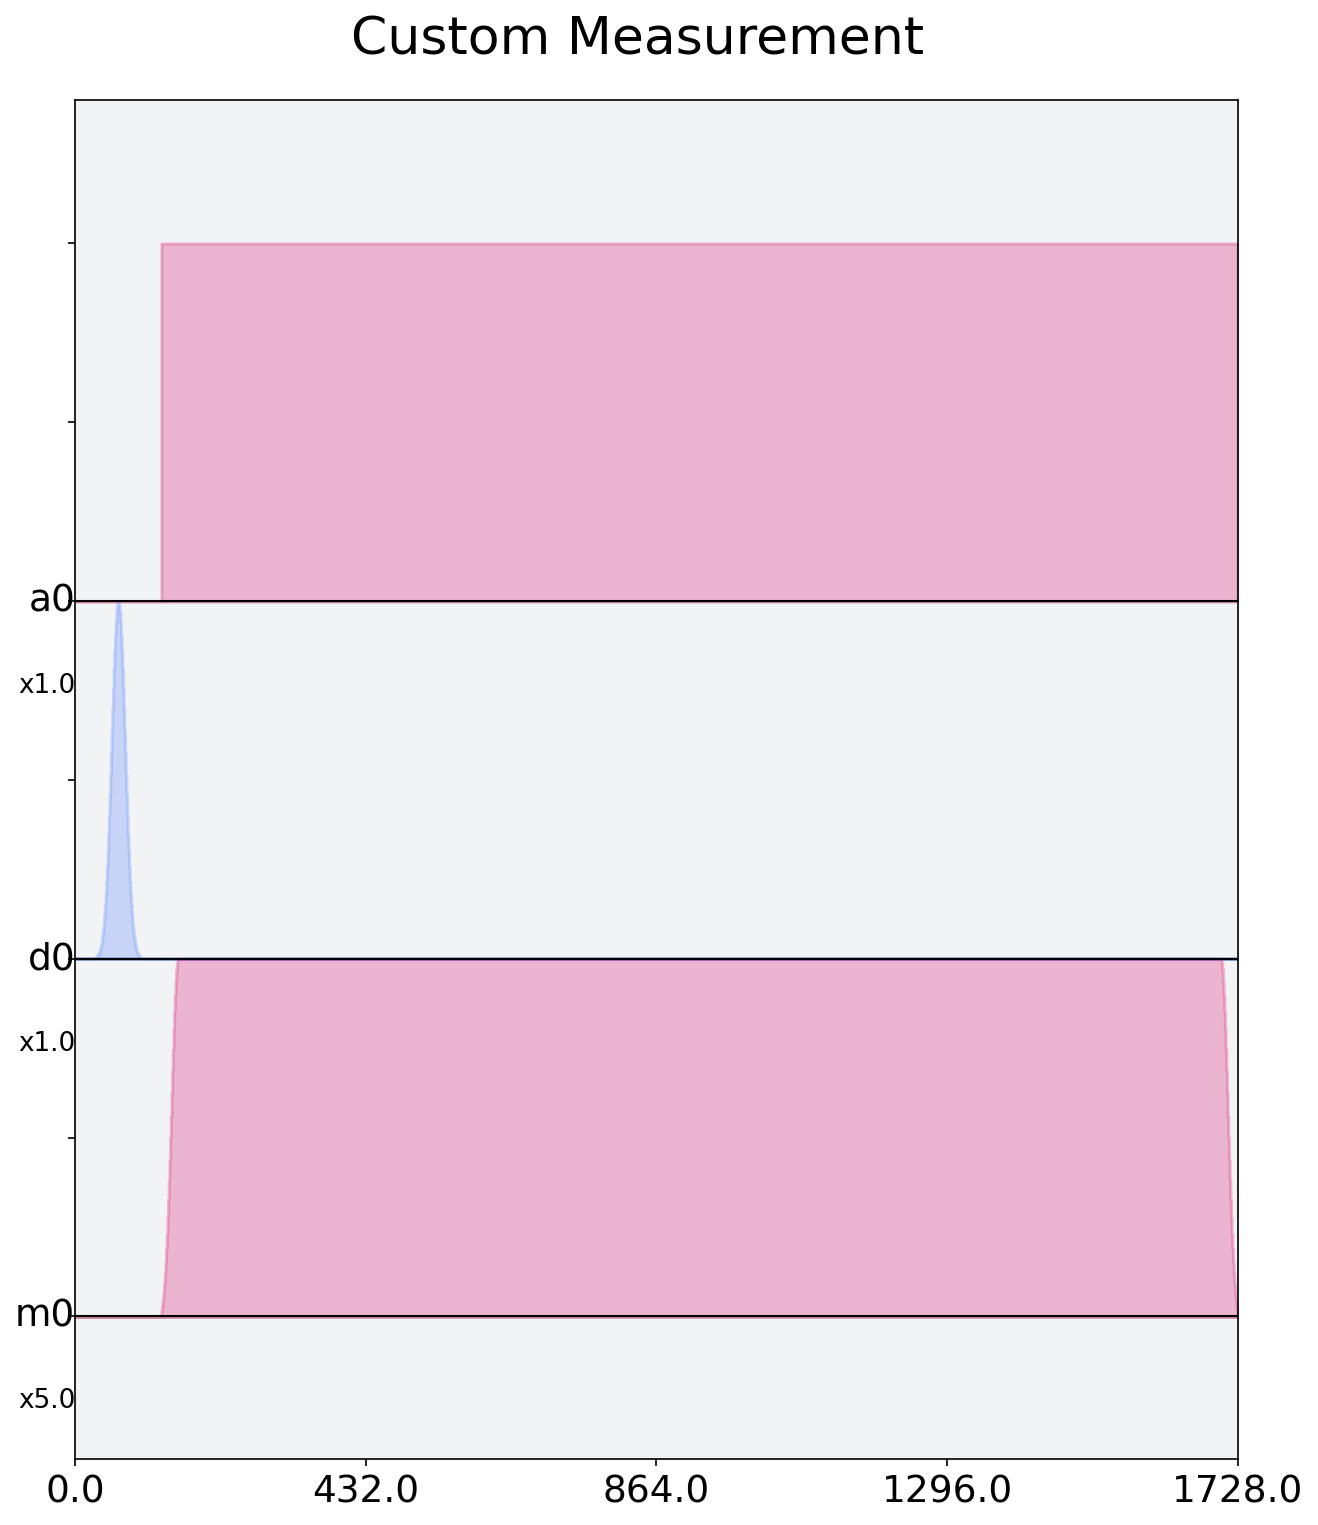

In [31]:
channel = DriveChannel(0)
sched = Schedule(name="Custom Measurement")

sched |= Play(pulse, channel)
sched |= get_custom_measurement() << sched.duration

sched.draw()

Job Status: job has successfully run


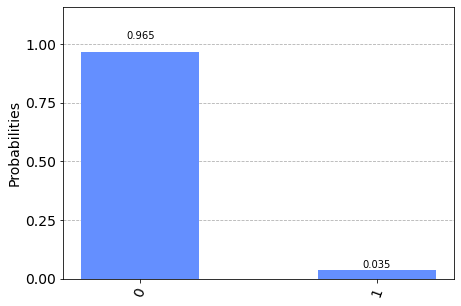

In [32]:
plot_histogram(run(sched, backend))